##Explore Patterns in Traffic Accident Data

This analysis explores patterns in traffic accident data, focusing on how road conditions, weather, and time of day influence accident frequency and severity. By analyzing the data, we aim to uncover relationships between these factors and accident outcomes, such as higher accident rates during rainy or icy conditions, or at certain times of the day. We will also perform hotspot analysis using geographic data to identify accident-prone areas, helping to pinpoint locations that may require safety improvements. The insights gained will be visualized through charts and maps to inform targeted interventions, with the goal of enhancing road safety and reducing accidents.

#1. Importing the library files

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn import metrics

# 2. Reading the Dataset

In [ ]:
data = pd.read_csv('/content/cleaned.csv')

In [ ]:
data

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2


#First 5 rows of the dataset

In [ ]:
data.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


#Last 5 rows of the dataset

In [ ]:
data.tail()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2
12315,18-30,Male,Junior high school,Employee,5-10yr,Undivided Two way,O Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Stopping,Crossing from nearside - masked by parked or s...,Changing lane to the right,2


#Thorough exploration of the dataset
Vewing the Columns in the dataset

In [ ]:
col = data.columns
print(col)

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')


#Checking for missing data before preprocessing


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)


Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64


# Replace 'Unknown' with the most frequently occurring value in each column

In [ ]:
data.replace('Unknown', pd.NA, inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)
print(data.head())

  Age_band_of_driver Sex_of_driver   Educational_level  \
0              18-30          Male   Above high school   
1              31-50          Male  Junior high school   
2              18-30          Male  Junior high school   
3              18-30          Male  Junior high school   
4              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience  \
0                Employee              1-2yr   
1                Employee         Above 10yr   
2                Employee              1-2yr   
3                Employee             5-10yr   
4                Employee              2-5yr   

                                   Lanes_or_Medians Types_of_Junction  \
0  Two-way (divided with broken lines road marking)       No junction   
1                                 Undivided Two way       No junction   
2                                             other       No junction   
3                                             other           Y Shape 

#List of categorical features

<ipython-input-700-da828be0e45a>:14: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


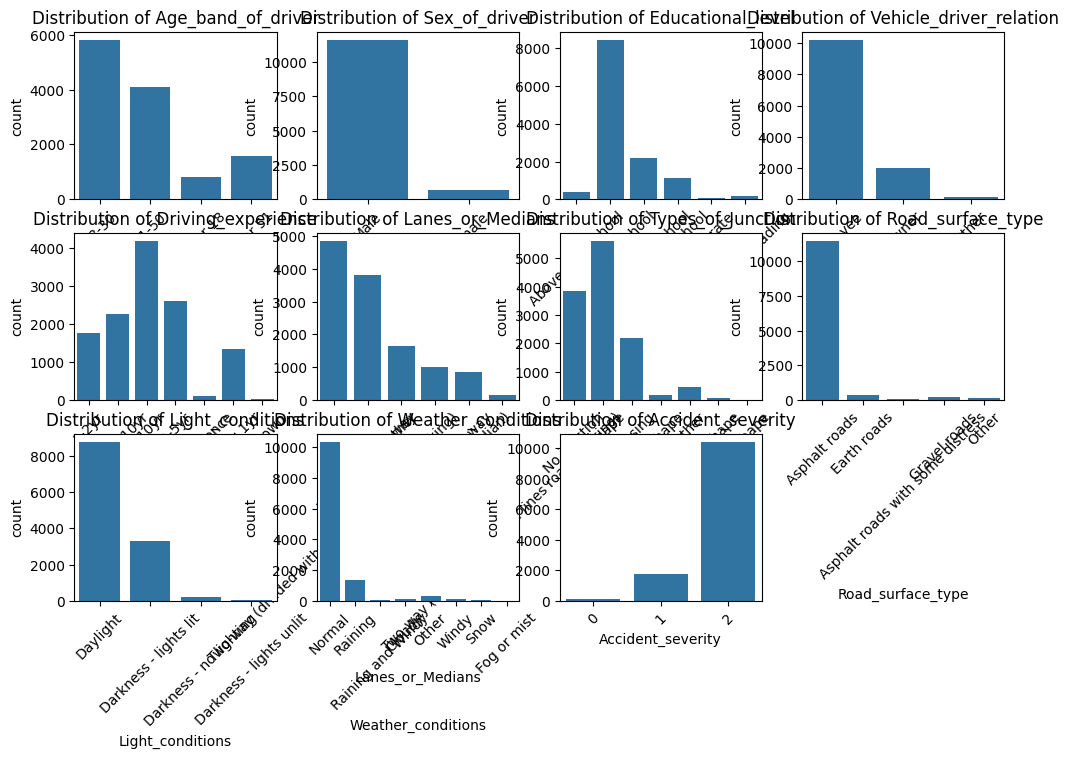

In [ ]:
categorical_features = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Accident_severity']
plt.figure(figsize=(12, 10))
num_features = len(categorical_features)
rows = (num_features // 3) + (num_features % 3 > 0)
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, 4, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Shape of the dataset


In [ ]:
print(data.shape)

(12316, 15)


#3. Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [ ]:
data.describe()

,Accident_severity
count,12316.000000
mean,1.832819
std,0.406082
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


#Data Exploration and Visualisation


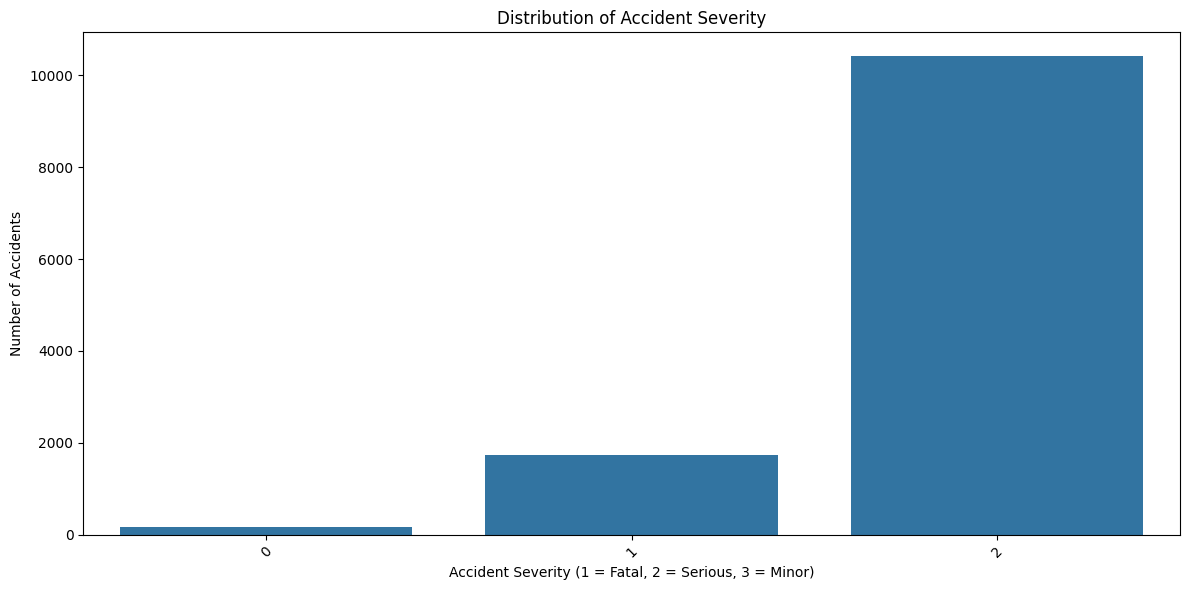

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust the size as needed
sns.countplot(x='Accident_severity', data=data)
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity (1 = Fatal, 2 = Serious, 3 = Minor)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate if needed
plt.tight_layout()  # Now it should work
plt.show()



# Analyze severity based on weather conditions

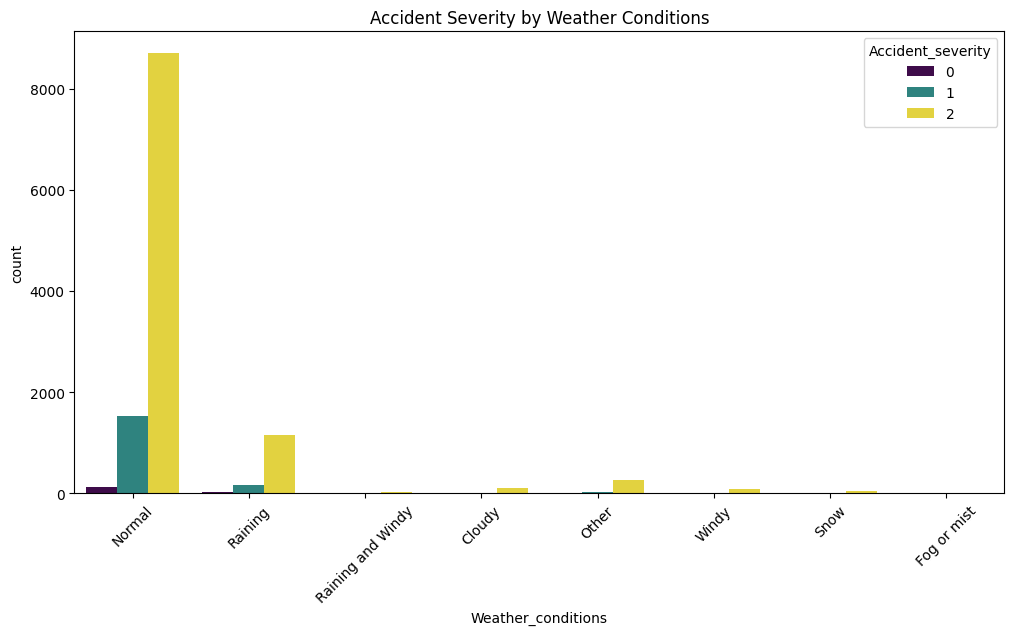

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Weather_conditions', hue='Accident_severity', data=data, palette='viridis')
plt.title('Accident Severity by Weather Conditions')
plt.xticks(rotation=45)
plt.show()

# Analyze severity based on road surface type

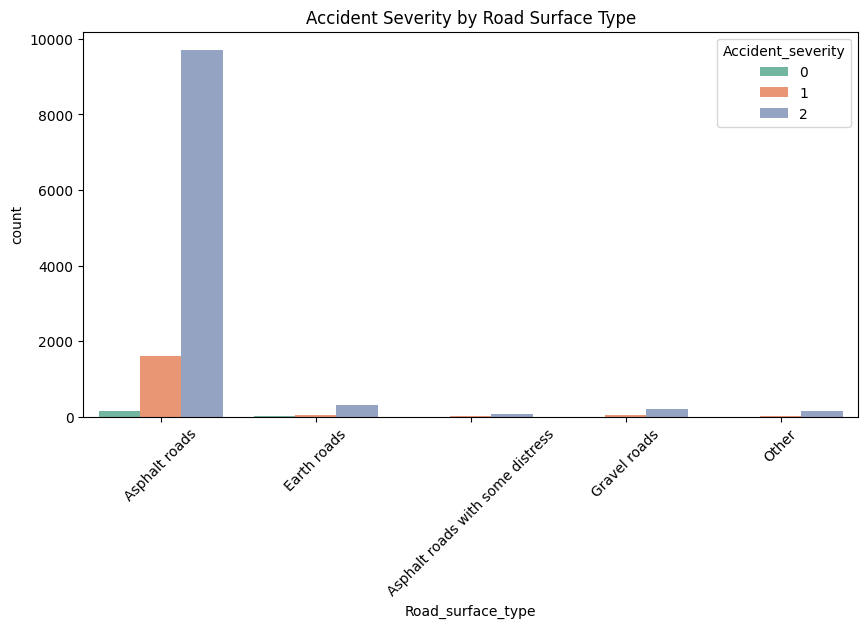

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=data, palette='Set2')
plt.title('Accident Severity by Road Surface Type')
plt.xticks(rotation=45)
plt.show()

#Accidents by Weather Conditions

<ipython-input-707-3ca46403623c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather_conditions', data=data, palette='magma')


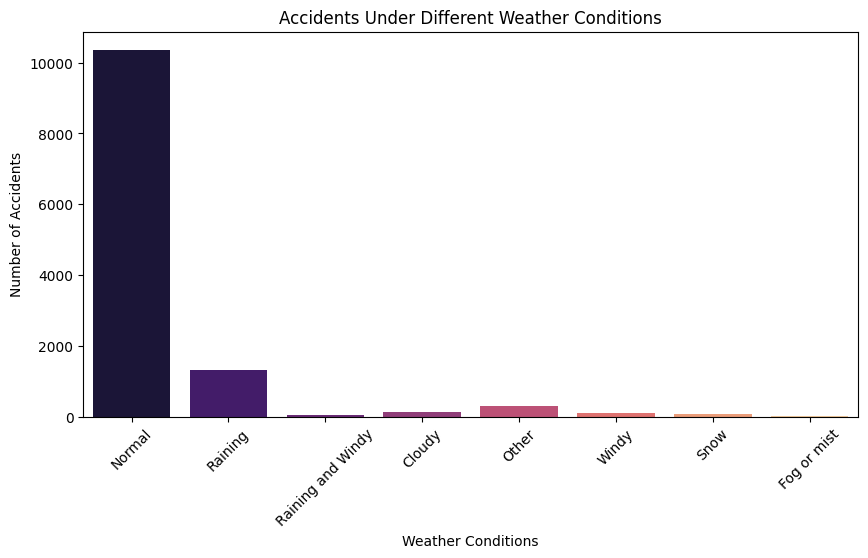

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weather_conditions', data=data, palette='magma')
plt.title("Accidents Under Different Weather Conditions")
plt.xticks(rotation=45)
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.show()

#Distribution of Driving Experience Among DriversAccidents by Time of Day

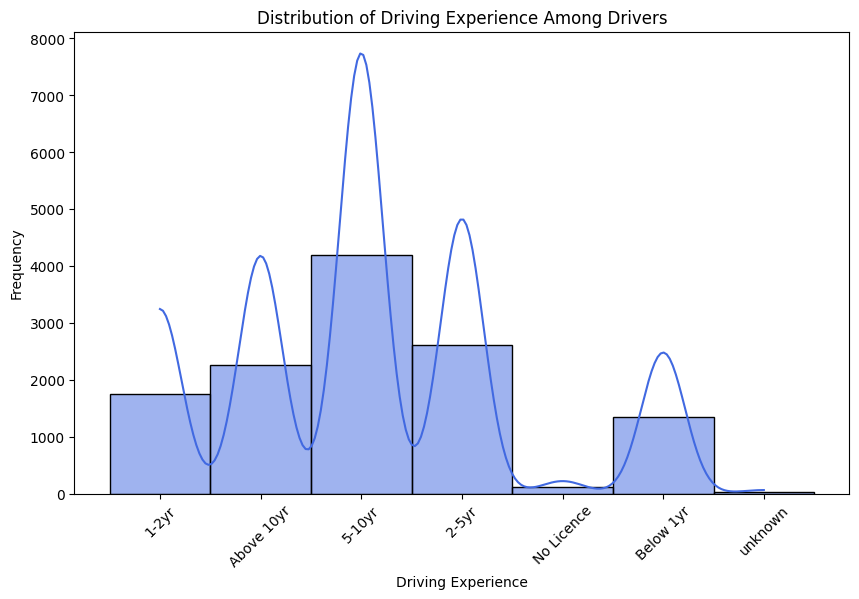

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Driving_experience', bins=10, kde=True, color='royalblue')
plt.title("Distribution of Driving Experience Among Drivers")
plt.xlabel("Driving Experience")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Accident Severity Distribution

<ipython-input-709-6fec9bfd4ea0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_severity', data=data, palette='coolwarm')


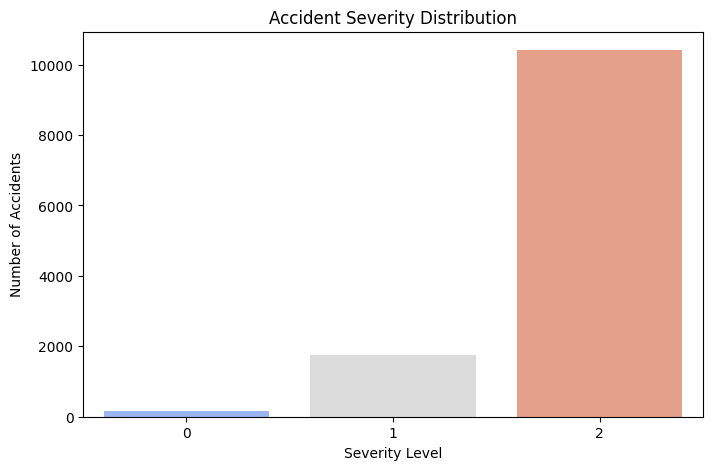

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Accident_severity', data=data, palette='coolwarm')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()

#Road Surface Type vs. Accidents

<ipython-input-710-17f7171d6ba3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Road_surface_type', data=data, palette='viridis')


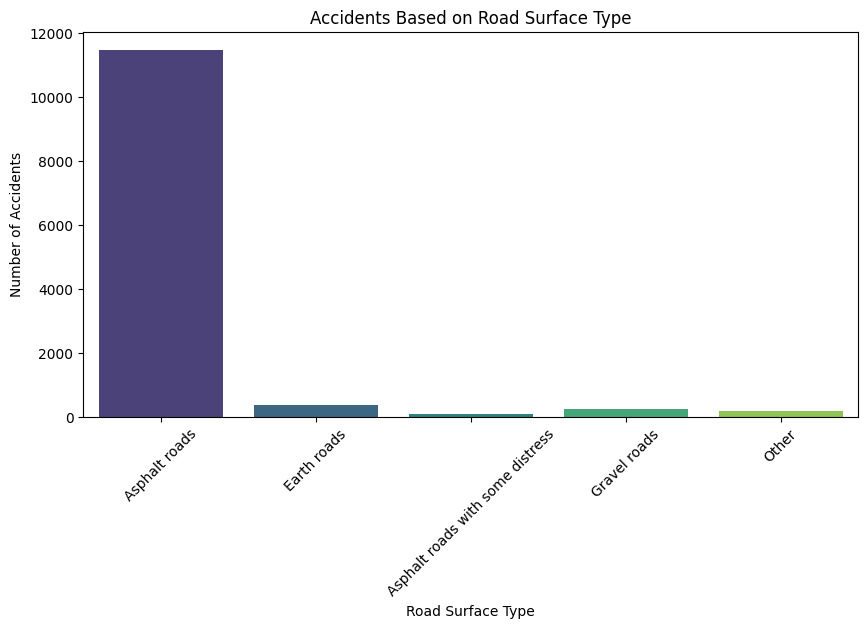

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Road_surface_type', data=data, palette='viridis')
plt.title("Accidents Based on Road Surface Type")
plt.xticks(rotation=45)
plt.xlabel("Road Surface Type")
plt.ylabel("Number of Accidents")
plt.show()

 #Accident Severity vs Time of Day (assuming 'Light_conditions' represents time of day)



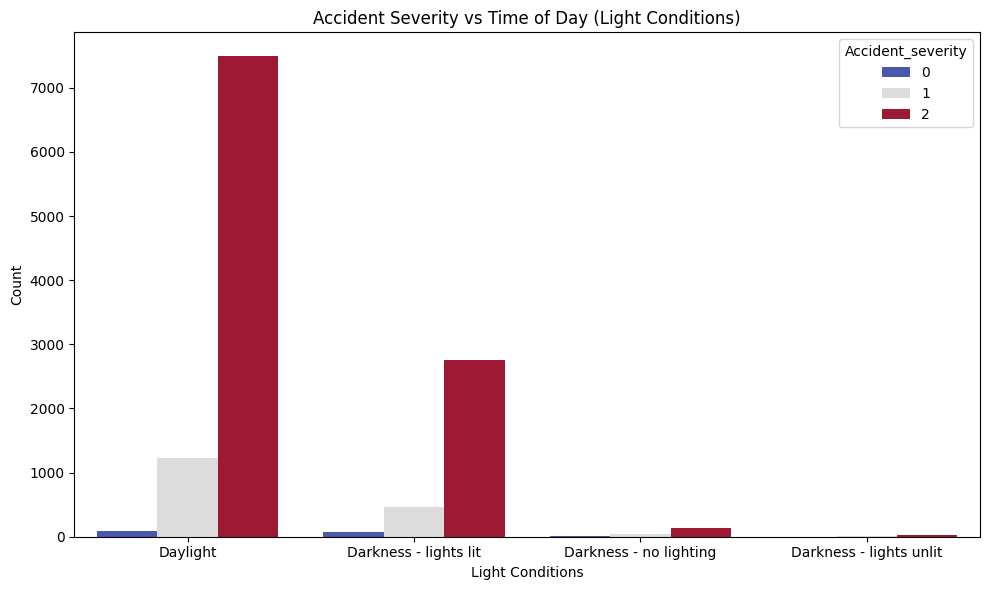

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Light_conditions', hue='Accident_severity', data=data, palette='coolwarm')
plt.title("Accident Severity vs Time of Day (Light Conditions)")
plt.xlabel("Light Conditions")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Accidents by Junction Type
Analyzing the most dangerous junctions.


<ipython-input-712-48b4402833b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Types_of_Junction', data=data, palette='coolwarm')


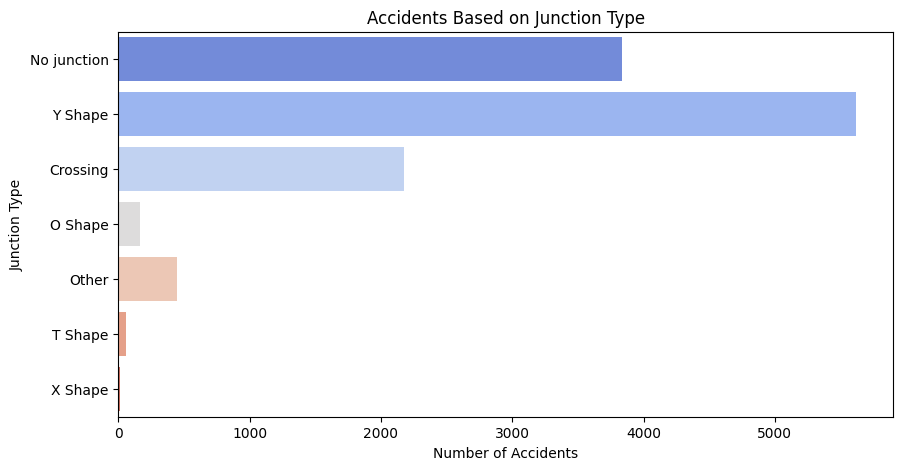

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='Types_of_Junction', data=data, palette='coolwarm')
plt.title("Accidents Based on Junction Type")
plt.xlabel("Number of Accidents")
plt.ylabel("Junction Type")
plt.show()

#Vehicle Movements in Accidents
Observing common vehicle movements before accidents.


<ipython-input-713-43ae039af156>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Vehicle_movement', data=data, palette='inferno')


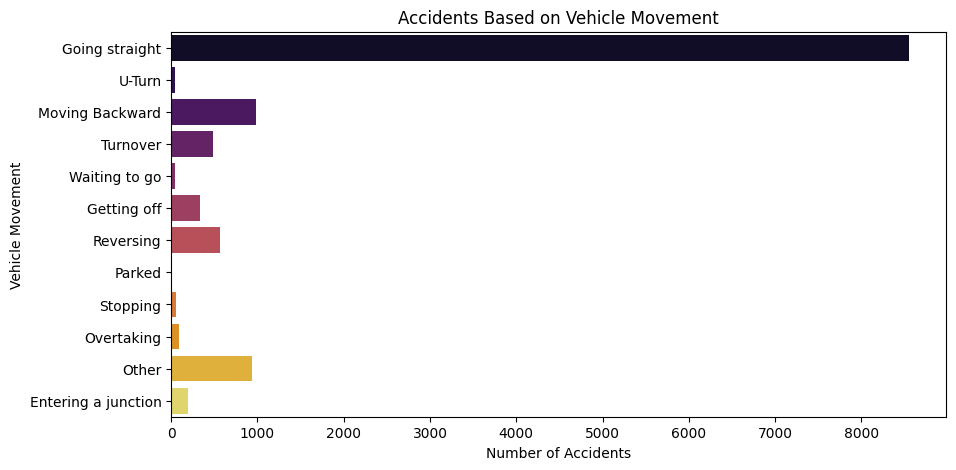

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='Vehicle_movement', data=data, palette='inferno')
plt.title("Accidents Based on Vehicle Movement")
plt.xlabel("Number of Accidents")
plt.ylabel("Vehicle Movement")
plt.show()

#Relationship Between Road Conditions & Accident Severity
Does poor road condition increase severity?


<ipython-input-714-2be1de21cc07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Road_surface_type', y='Accident_severity', data=data, palette='viridis')


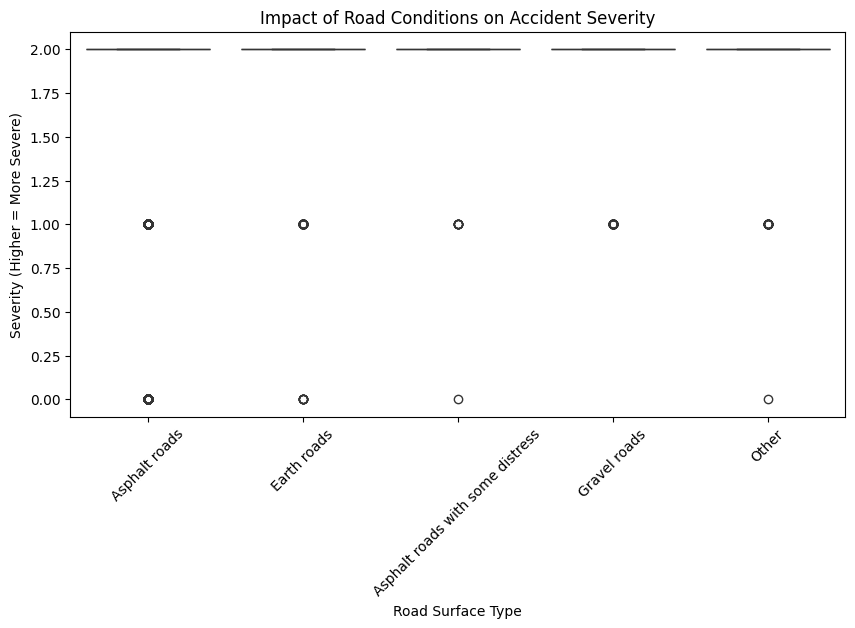

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Road_surface_type', y='Accident_severity', data=data, palette='viridis')
plt.title("Impact of Road Conditions on Accident Severity")
plt.xticks(rotation=45)
plt.xlabel("Road Surface Type")
plt.ylabel("Severity (Higher = More Severe)")
plt.show()

#  Vehicle Movement vs Accident Severity

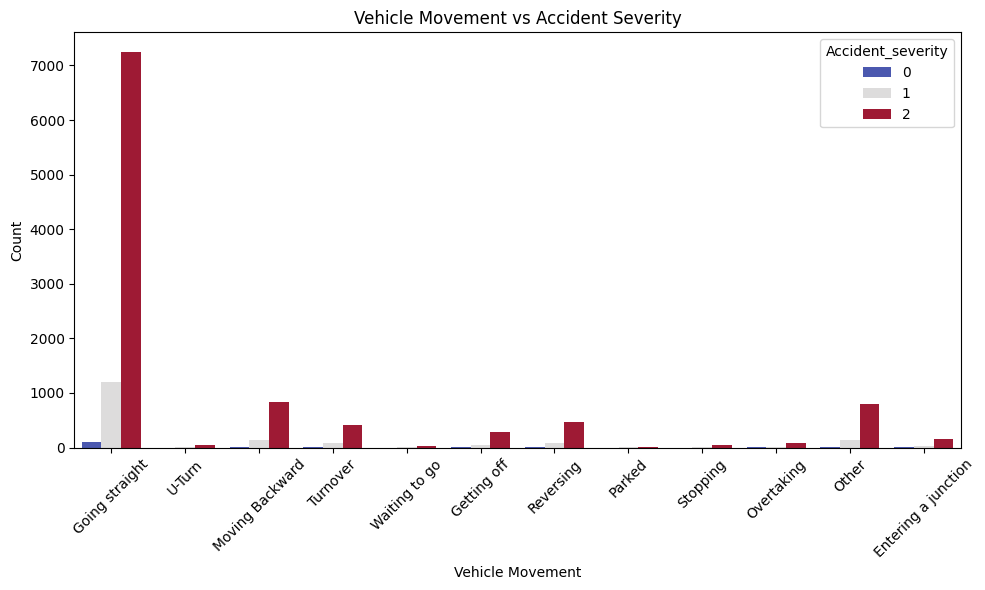

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_movement', hue='Accident_severity', data=data, palette='coolwarm')
plt.title("Vehicle Movement vs Accident Severity")
plt.xlabel("Vehicle Movement")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ## 4. Driving Experience vs Accident Severity


Finding accident hotspots using lat-long data.


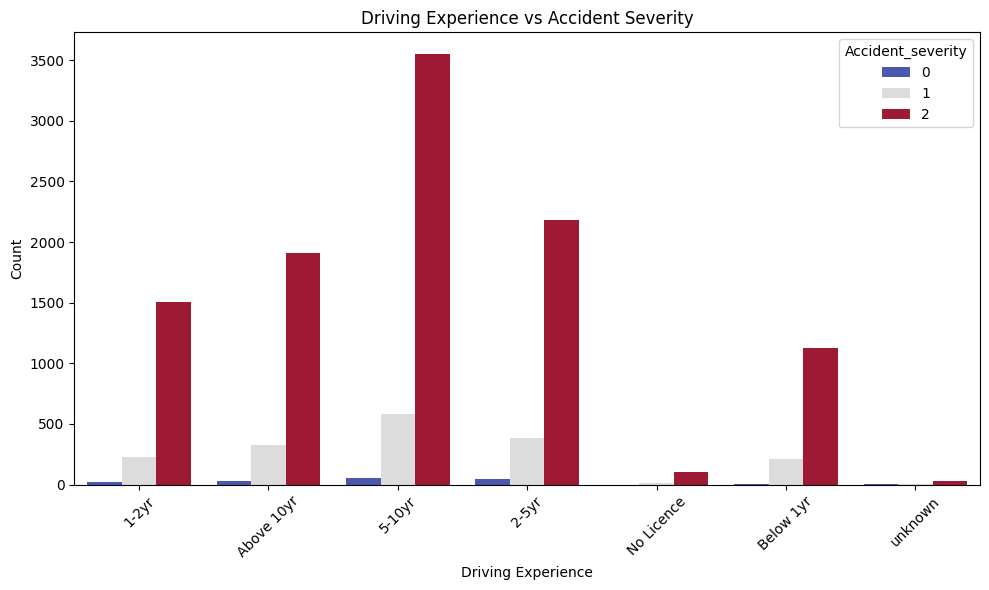

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Driving_experience', hue='Accident_severity', data=data, palette='coolwarm')
plt.title("Driving Experience vs Accident Severity")
plt.xlabel("Driving Experience")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vehicle Type & Movement Before Accident
Checking if certain vehicle types & movements are riskier.


<ipython-input-717-f30927236c04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Vehicle_movement', data=data, palette='inferno', order=data['Vehicle_movement'].value_counts().index)


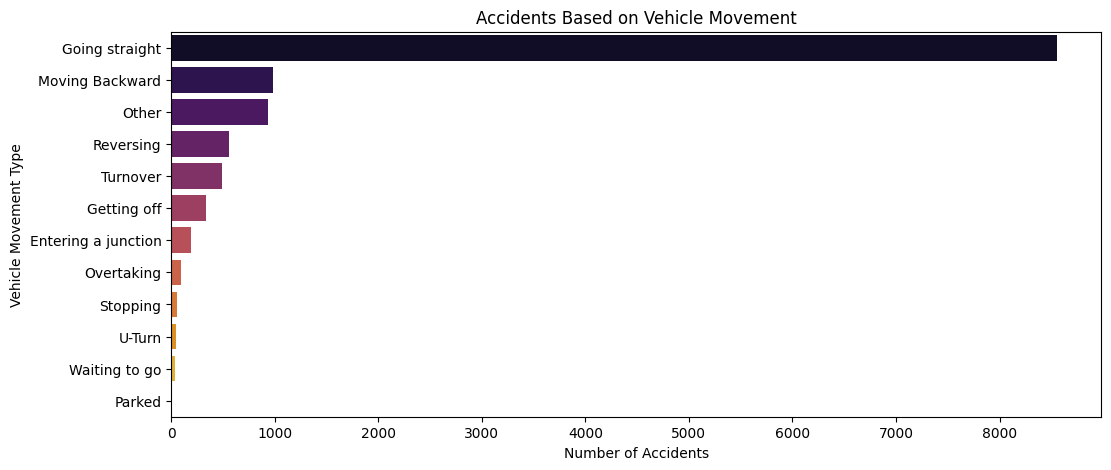

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(y='Vehicle_movement', data=data, palette='inferno', order=data['Vehicle_movement'].value_counts().index)
plt.title("Accidents Based on Vehicle Movement")
plt.xlabel("Number of Accidents")
plt.ylabel("Vehicle Movement Type")
plt.show()

 #Cause of Accidents vs. Severity
Understanding how accident causes impact severity.



<ipython-input-718-69e5b1b07f08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cause_of_accident', y='Accident_severity', data=data, palette='magma')


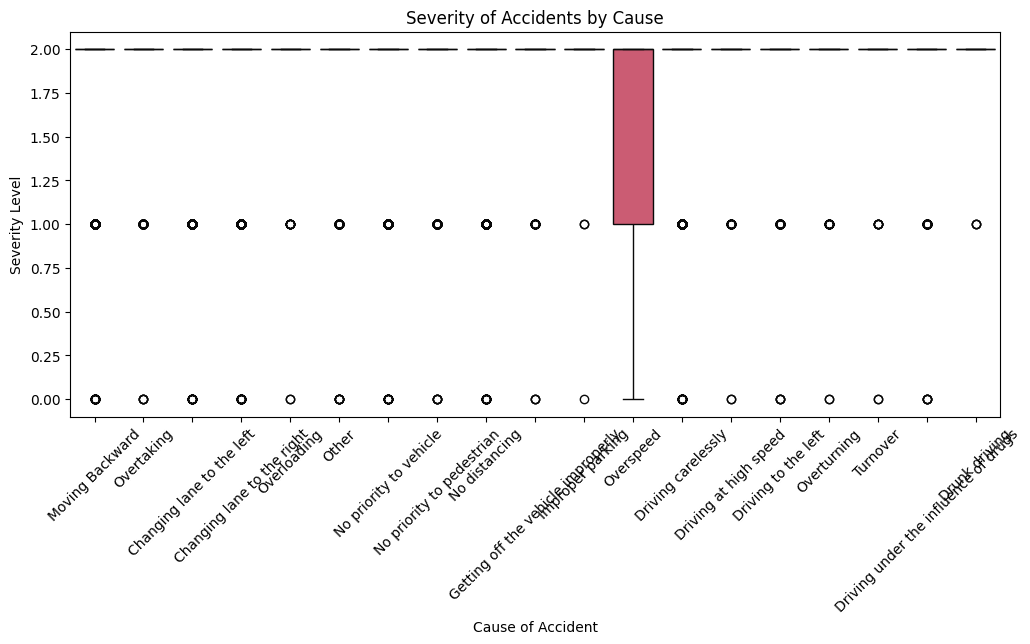

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Cause_of_accident', y='Accident_severity', data=data, palette='magma')
plt.xticks(rotation=45)
plt.title("Severity of Accidents by Cause")
plt.xlabel("Cause of Accident")
plt.ylabel("Severity Level")
plt.show()

#Exploratory Data Analysis & Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns

print("🔍 Unique values in categorical columns BEFORE encoding:\n")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")
print("\n🚀 Applying Label Encoding...\n")

# Apply Label Encoding in place
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])
print("✅ Encoding Complete!\n")
print("🔢 Unique values in categorical columns AFTER encoding:\n")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")
print("\n📊 Preview of Encoded Data:")

🔍 Unique values in categorical columns BEFORE encoding:

Age_band_of_driver: ['18-30' '31-50' 'Under 18' 'Over 51']
Sex_of_driver: ['Male' 'Female']
Educational_level: ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation: ['Employee' 'Owner' 'Other']
Driving_experience: ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'unknown']
Lanes_or_Medians: ['Two-way (divided with broken lines road marking)' 'Undivided Two way'
 'other' 'Double carriageway (median)' 'One way'
 'Two-way (divided with solid lines road marking)']
Types_of_Junction: ['No junction' 'Y Shape' 'Crossing' 'O Shape' 'Other' 'T Shape' 'X Shape']
Road_surface_type: ['Asphalt roads' 'Earth roads' 'Asphalt roads with some distress'
 'Gravel roads' 'Other']
Light_conditions: ['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lights unlit']
Weather_conditions: ['Normal' 'Raining' 'Raining and Windy' 'Cloudy' '

In [ ]:
data.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,1,0,0,0,2,1,0,3,2,3,2,5,9,2
1,1,1,4,0,3,4,1,0,3,2,7,2,5,16,2
2,0,1,4,0,0,5,1,0,3,2,2,2,5,0,1
3,0,1,4,0,2,5,6,2,0,2,7,2,5,1,2
4,0,1,4,0,1,5,6,0,0,2,7,2,5,16,2


In [ ]:
from sklearn.preprocessing import LabelEncoder


# List of columns to encode
categorical_columns = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
                       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
                       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
                       'Weather_conditions', 'Accident_severity']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding for categorical columns
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

#Heatmap for Correlation:

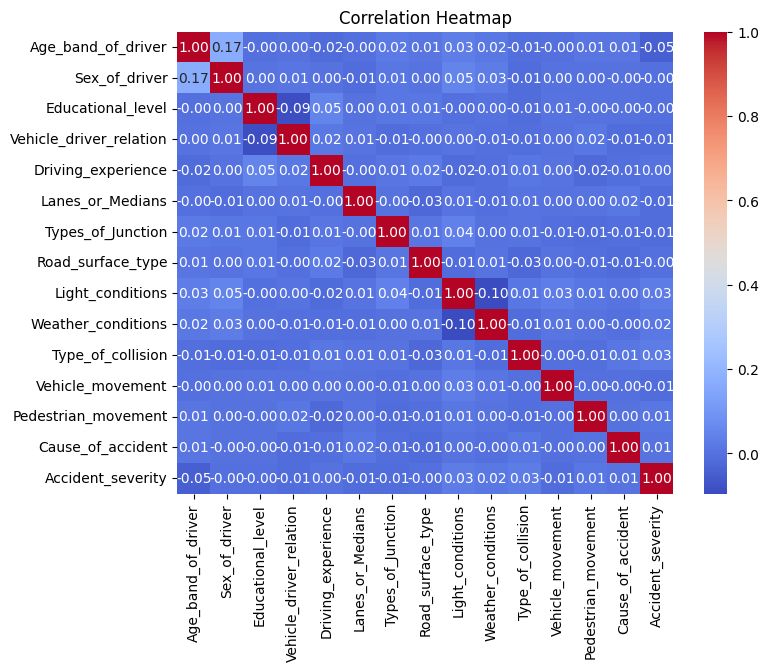

In [ ]:
plt.figure(figsize=(8,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr = data.corr()
corr

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
Age_band_of_driver,1.000000,0.166643,-0.002121,0.000815,-0.015432,-0.001607,0.022486,0.007405,0.031434,0.019277,-0.007469,-0.002894,0.011444,0.010637,-0.046447
Sex_of_driver,0.166643,1.000000,0.003518,0.007904,0.002993,-0.013301,0.013417,0.004382,0.049605,0.026056,-0.010568,0.002870,0.002778,-0.000184,-0.002756
Educational_level,-0.002121,0.003518,1.000000,-0.089444,0.050154,0.000017,0.014433,0.012422,-0.001636,0.002844,-0.011165,0.006558,-0.000793,-0.000878,-0.001227
Vehicle_driver_relation,0.000815,0.007904,-0.089444,1.000000,0.016062,0.005972,-0.009884,-0.001564,0.004481,-0.005391,-0.005724,0.001641,0.015068,-0.012677,-0.012428
Driving_experience,-0.015432,0.002993,0.050154,0.016062,1.000000,-0.004582,0.009588,0.020872,-0.015577,-0.008205,0.011736,0.003596,-0.018790,-0.007700,0.000509
Lanes_or_Medians,-0.001607,-0.013301,0.000017,0.005972,-0.004582,1.000000,-0.000112,-0.025786,0.006314,-0.007422,0.005798,0.000746,0.004714,0.015128,-0.013926
Types_of_Junction,0.022486,0.013417,0.014433,-0.009884,0.009588,-0.000112,1.000000,0.009189,0.039163,0.000490,0.006741,-0.007581,-0.009821,-0.005671,-0.009880
Road_surface_type,0.007405,0.004382,0.012422,-0.001564,0.020872,-0.025786,0.009189,1.000000,-0.011965,0.006875,-0.025592,0.001246,-0.006762,-0.014246,-0.004510
Light_conditions,0.031434,0.049605,-0.001636,0.004481,-0.015577,0.006314,0.039163,-0.011965,1.000000,-0.095294,0.014285,0.029038,0.014229,0.003305,0.025741
Weather_conditions,0.019277,0.026056,0.002844,-0.005391,-0.008205,-0.007422,0.000490,0.006875,-0.095294,1.000000,-0.011364,0.008178,0.003667,-0.003143,0.016197


#4. Splitting the data

In [ ]:
X = data.drop(columns=['Accident_severity'])


# Print the shapes of X and y to confirm the split

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (12316, 14)
y shape: (12316,)


In [ ]:
X

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,0,1,0,0,0,2,1,0,3,2,3,2,5,9
1,1,1,4,0,3,4,1,0,3,2,7,2,5,16
2,0,1,4,0,0,5,1,0,3,2,2,2,5,0
3,0,1,4,0,2,5,6,2,0,2,7,2,5,1
4,0,1,4,0,1,5,6,0,0,2,7,2,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,1,4,0,1,4,1,0,3,2,7,2,5,10
12312,0,1,1,0,2,2,1,0,3,2,7,4,5,10
12313,2,1,4,0,2,2,1,0,3,2,7,4,5,1
12314,0,0,4,0,3,4,1,0,0,2,7,4,5,5


In [ ]:
y

,Accident_severity
0,2
1,2
2,1
3,2
4,2
...,...
12311,2
12312,2
12313,1
12314,2


#Splitting into Training and Testing sets and balance the class labels

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Resampled class distribution in y_train:", y_train.value_counts())

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Resampled class distribution in y_train: Accident_severity
2    8351
1    8351
0    8351
Name: count, dtype: int64


# Display the shapes of the resulting datasets

In [ ]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (25053, 14)
Testing features shape: (2464, 14)
Training labels shape: (25053,)
Testing labels shape: (2464,)


5. Building The Models

# Implimenting KNN Classifier and analysing the perfomance

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 knn = KNeighborsClassifier(n_neighbors=5)
 classifier = knn.fit(X_train,y_train)
 y_pred = classifier.predict(X_test)

In [ ]:
confusion = metrics.confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion

array([[   1,   13,   23],
       [  30,   97,  236],
       [ 161,  618, 1285]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.03      0.01        37
           1       0.13      0.27      0.18       363
           2       0.83      0.62      0.71      2064

    accuracy                           0.56      2464
   macro avg       0.32      0.31      0.30      2464
weighted avg       0.72      0.56      0.62      2464

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.56
-------------------------------------------------------------------


##------------------------------------------------------------------  THE END   ---------------------------------------------------------------------